In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [7]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [8]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

#### distribution of length of the tweets, in terms of words, in both train and test data.

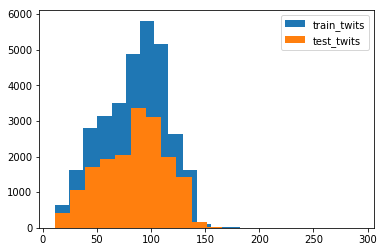

In [10]:
len_train = train['tweet'].str.len()
len_test = test['tweet'].str.len()
plt.hist(len_train, bins = 20, label = 'train_twits')
plt.hist(len_test, bins = 20, label = 'test_twits')
plt.legend()
plt.show()

In [9]:
combine = train.append(test, ignore_index = True)
combine.shape

C:\Users\Pratik\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(49159, 3)

In [10]:
# function to remove unwanted text patterns from the tweets.

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt



In [11]:
#  Removing Twitter Handles (@user)
# new column tidy_tweet,will contain the cleaned and processed tweets

combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.tail(10)

,id,label,tweet,tidy_tweet
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfuture #lifestyle #holiday #la @ hyatt regency long beach,loving lifeðºð¸âï¸ð #createyourfuture #lifestyle #holiday #la hyatt regency long beach
49150,49151,NaN,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking","black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking"
49151,49152,NaN,learn how to think positive. #positive #instagram #instagood,learn how to think positive. #positive #instagram #instagood
49152,49153,NaN,"we love the pretty, happy and fresh you! #teenilicious #fixdermateen #generationz #pretty #fresh","we love the pretty, happy and fresh you! #teenilicious #fixdermateen #generationz #pretty #fresh"
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web-1997-ukhx_int . #web hardcore #1gabba #vk,2_damn_tuff-ruff_muff__techno_city-(ng005)-web-1997-ukhx_int . #web hardcore #1gabba #vk
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization","#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset","happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze #newmusic #newsong","my song ""so glad"" free download! #shoegaze #newmusic #newsong"


In [12]:
# Removing Punctuations, Numbers, and Special Characters
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [13]:
# Removing Short Words
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3 ]))

combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [14]:
# Text Normalization
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split())        # tokenizing
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
# nltk’s PorterStemmer() function to normalize the tweets.

from nltk.stem.porter import * 

In [16]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
print(tokenized_tweet.head())

# stitch these tokens back together.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['tidy_tweet'] = tokenized_tweet

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object


In [17]:
combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#### Understanding the common words used in the tweets using WordCloud

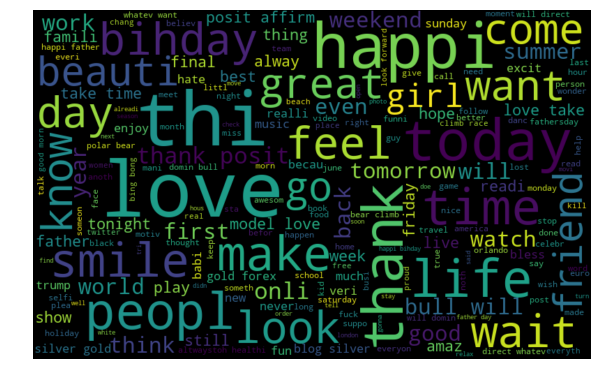

In [20]:
all_words =  ' '.join([txt for txt in combine['tidy_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=47, max_font_size=110).generate(all_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

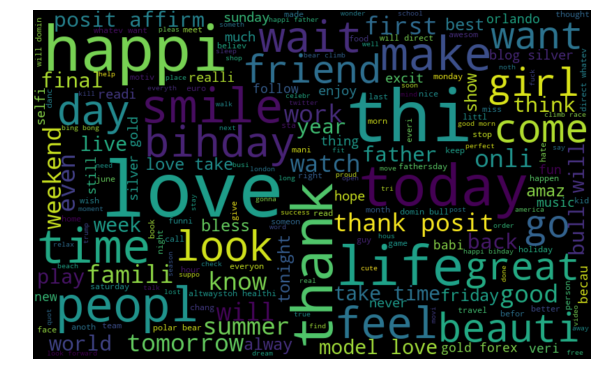

In [21]:
# Words in non racist/sexist tweets

normal_words = ' '.join([txt for txt in combine['tidy_tweet'][combine['label'] == 0 ]])
wordcloud = WordCloud(width=800, height=500, random_state=47, max_font_size=110).generate(normal_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

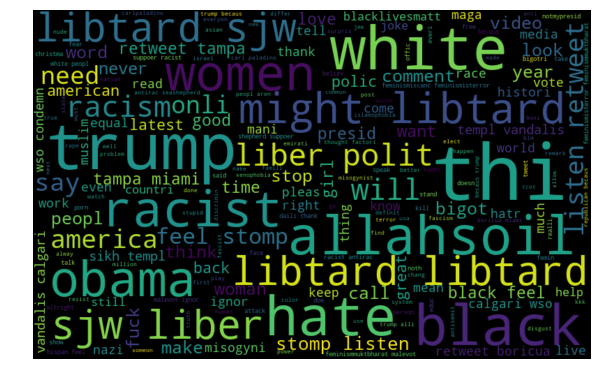

In [22]:
#  Racist/Sexist Tweets

neg_words = ' '.join([txt for txt in combine['tidy_tweet'][combine['label'] == 1 ]])
wordcloud = WordCloud(width=800, height=500, random_state=47, max_font_size=110).generate(neg_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [18]:
#  impact of Hashtags on tweets sentiment

def hashtag_ext(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist/sexist tweets
ht_regular = hashtag_ext(combine['tidy_tweet'][combine['label'] ==  0])

# extracting hashtags from racist/sexist tweets
ht_negative = hashtag_ext(combine['tidy_tweet'][combine['label'] == 1])

ht_regular = sum(ht_regular, [])
ht_negative = sum(ht_negative, [])


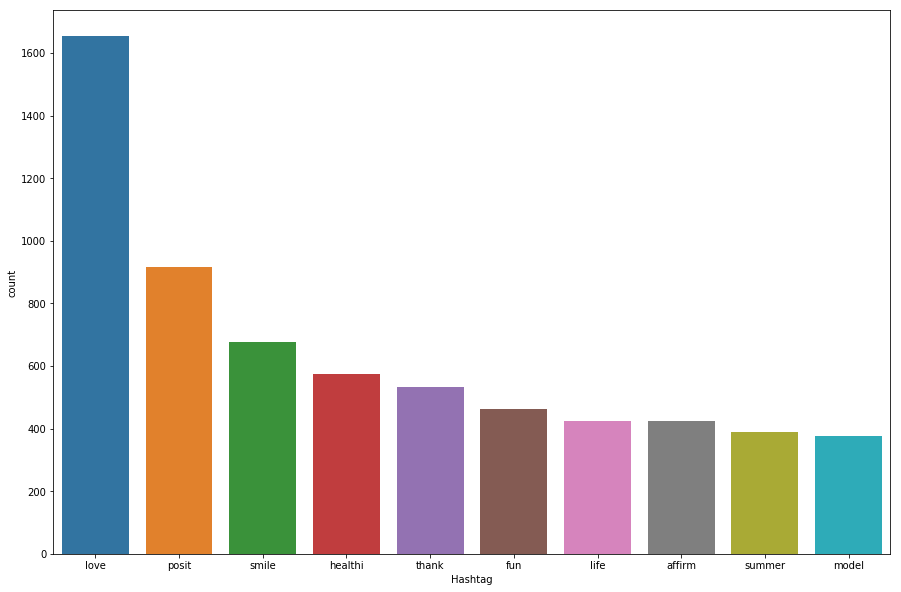

In [24]:
# for Non-Racist/Sexist Tweets
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({'Hashtag' : list(a.keys()),
                 'count' : list(a.values())})

# selecting top 10 most frequent hashtags 
d = d.nlargest(columns = 'count', n = 10)
plt.figure(figsize = (15,10))
ax = sns.barplot(data = d, x = "Hashtag", y = "count")
ax.set(ylabel = 'count')
plt.show()

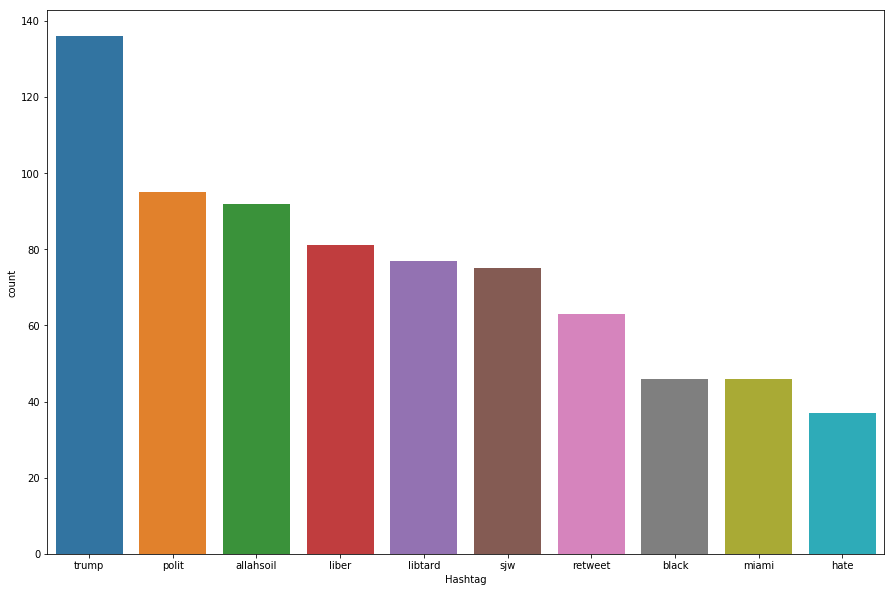

In [25]:
# for Racist/Sexist Tweets

b = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(b.keys()),
                 'count' : list(b.values())})
d = d.nlargest(columns = 'count', n = 10)
plt.figure(figsize = (15,10))
ax = sns.barplot(data = d, x = "Hashtag", y = "count")
ax.set(ylabel = 'count')
plt.show()

In [24]:
# Bag-of-Words Features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bg_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')

bow = bg_vectorizer.fit_transform(combine['tidy_tweet'])
bow.shape

(49159, 1000)

In [25]:
# TF-IDF Features
"""TF-IDF works by penalizing the common words by assigning them lower weights
    while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents."""

tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 2500, stop_words = 'english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combine['tidy_tweet'])
tfidf.shape

(49159, 2500)

In [26]:
# Word2Vec Embeddings
#    Word2Vec is not a single algorithm but a combination of two techniques –CBOW (Continuous bag of words) and Skip-gram model.
#    CBOW tends to predict the probability of a word given a context.
#    A context may be a single adjacent word or a group of surrounding words. 
#    The Skip-gram model works in the reverse manner, it tries to predict the context for a given word. 

from gensim.models import Word2Vec
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split())    # tokenizing
model_w2v = Word2Vec(tokenized_tweet,
                                   size = 200,# desired no of features
                                   window = 5, #context window size
                                   min_count = 2, sg = -1, hs = 0,
                                   negative = 10, # for -ve sampling
                                   workers = 4, #no. of cores
                                   seed = 47)

model_w2v.train(tokenized_tweet, total_examples = len(combine['tidy_tweet']), epochs = 20)



(6510342, 7536020)

In [29]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.5640190839767456),
 ('noodl', 0.561587393283844),
 ('#cellar', 0.5577630400657654),
 ('#avocado', 0.5576225519180298),
 ('cookout', 0.5490617156028748),
 ('lukey', 0.5451882481575012),
 ('alfredo', 0.5373491048812866),
 ('fav', 0.5333993434906006),
 ('#lovefood', 0.5316289067268372),
 ('enrout', 0.5303860902786255)]

In [30]:
model_w2v.wv.most_similar(positive = "trump")

[('hillari', 0.5622709393501282),
 ('potu', 0.5598908066749573),
 ('donald', 0.5521620512008667),
 ('unstabl', 0.5409462451934814),
 ('tomlin', 0.5398882627487183),
 ('jibe', 0.5388935804367065),
 ('melo', 0.5362138748168945),
 ('phoni', 0.535753607749939),
 ('unfavor', 0.5353314280509949),
 ('roseann', 0.5310602188110352)]

In [31]:
model_w2v['food']

array([ 3.35567266e-01,  5.06328404e-01,  5.18472612e-01, -2.52325356e-01,
        1.42000243e-01, -3.00382525e-01, -4.27823029e-02,  2.29367718e-01,
       -9.26538229e-01, -6.78478181e-02, -9.29821730e-02, -9.31803584e-01,
       -1.70782104e-01,  1.67838380e-01,  6.27998412e-01, -3.24024886e-01,
       -4.07117866e-02, -6.50572628e-02,  4.21069473e-01, -9.16506708e-01,
        6.43613413e-02, -1.16283096e-01, -2.89260209e-01, -1.15266338e-01,
       -9.48842987e-02,  5.01334488e-01,  3.01418424e-01, -9.98266712e-02,
       -8.02326500e-01,  1.48227662e-01,  1.30514503e-01,  3.35012898e-02,
        6.78310752e-01,  7.92534724e-02, -4.72995192e-01, -1.35954963e-02,
        2.76084900e-01, -3.78243953e-01, -7.33662367e-01, -2.77626336e-01,
       -1.40135258e-01,  1.34773746e-01,  3.08016479e-01,  4.90888596e-01,
        3.20927709e-01, -7.49753565e-02,  2.63200372e-01, -7.60853052e-01,
       -8.86463448e-02, -7.01761186e-01,  4.09953820e-04,  2.91085273e-01,
       -4.10731345e-01, -

In [32]:
len(model_w2v['food'])

200

In [20]:
# Preparing Vectors for Tweets

#Since our data contains tweets and not just words, we take mean of all the word vectors present in the tweet. 
#The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors.
#Now we have 200 word2vec features for our data.

def word_vect(tokens, size):
    vec = np.zeros(size).reshape(1, size)
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1
        except KeyError:       # handling the case where the token is not in vocabulary
            continue
            
    if count != 0:
        vec /= count
    
    return vec

In [21]:
# Preparing word2vec feature set

wordvec_array = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_array[i, :] = word_vect(tokenized_tweet[i], 200)
    wordvect_df = pd.DataFrame(wordvec_array)
    
wordvect_df.shape

# we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

(49159, 200)

### Logistic Regression

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Extracting train and test BoW features
train_bow = bow[:31962, :]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
                                                                  test_size = 0.20, random_state = 47)
lr = LogisticRegression()
lr.fit(xtrain_bow, ytrain)
prediction = lr.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3       # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)


C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5288831835686778

In [36]:
# predictions for the test dataset 
test_predict = lr.predict_proba(test_bow)
testpredict_int = test_predict[:,1] >= 0.3
testpredict_int = testpredict_int.astype(np.int)
test['label'] = testpredict_int



In [37]:
# Building model using TF-IDF features

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lr.fit(xtrain_tfidf, ytrain)

prediction = lr.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)



0.6253443526170799

In [30]:
# Building model using word2vector features
train_w2v = wordvect_df.iloc[:31962,:]
test_w2v = wordvect_df.iloc[31962:,:] 

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lr.fit(xtrain_w2v, ytrain) 
prediction = lr.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)
xtrain_w2v
train_w2v


C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.436446,-0.209954,0.352945,-0.318353,-0.222262,0.056635,0.275544,0.175003,0.159282,-0.242064,...,-0.021186,0.025752,-0.100045,0.221546,0.279488,-0.043936,-0.087776,0.212203,0.020358,0.620787
1,0.509018,-0.037261,0.023408,-0.111209,0.089350,-0.037548,-0.073937,0.260274,-0.099506,-0.027323,...,-0.184087,-0.187489,0.135142,0.148521,0.303308,-0.075306,-0.225594,0.062893,-0.049574,0.254094
2,0.468806,-0.194613,-0.058007,-0.250558,-0.015548,0.014336,-0.062841,0.267684,-0.165398,0.042712,...,-0.316236,-0.160425,-0.186464,0.240271,0.241541,0.173269,-0.210852,0.071777,-0.118236,0.429732
3,0.408401,-0.076098,0.248332,-0.338023,0.148934,-0.186938,-0.150599,0.135513,0.298905,-0.175785,...,-0.050153,0.192886,0.512948,0.390483,0.002270,0.383289,-0.003718,-0.060970,0.132086,0.538153
4,0.828672,-0.087828,-0.056160,-0.006017,-0.135213,-0.120706,0.166430,0.174381,-0.255933,-0.025499,...,-0.212460,0.153363,0.030727,0.374592,0.649806,0.203726,0.314527,0.390530,-0.151041,0.161294
5,0.627840,-0.250984,0.157244,-0.125344,-0.062165,0.094218,0.088216,0.104757,0.002256,-0.020179,...,-0.227442,-0.031504,0.117290,0.363410,0.258492,0.024155,-0.289440,0.005713,0.112762,0.562033
6,0.242709,-0.276192,0.116088,0.022718,-0.045319,-0.088372,0.071465,-0.376641,0.100841,-0.113997,...,-0.178674,-0.015778,0.062970,0.151835,-0.563458,0.390105,-0.140453,-0.018054,-0.013748,0.361787
7,0.347500,-0.233900,0.056841,-0.193512,-0.327712,0.038221,-0.020187,-0.012680,0.055544,-0.138409,...,-0.147122,0.214292,-0.251476,0.137574,-0.037484,0.158691,-0.111975,0.084576,-0.036022,0.486208
8,0.169424,-0.118012,-0.010365,-0.422044,0.156035,0.203499,-0.038755,0.236134,0.310015,-0.033480,...,-0.121754,0.075208,0.127554,0.135239,0.030427,0.370000,-0.186821,0.021786,0.155944,0.451031
9,0.219349,-0.187221,0.341629,-0.386016,-0.016462,0.082233,-0.328422,-0.098681,-0.326299,0.145293,...,0.119476,-0.144241,-0.193963,0.624984,-0.033454,-0.539394,0.412622,-0.202003,0.300467,0.566852


### Support Vector Machine (SVM)


In [ ]:
# Bag-of-Words Features
from sklearn import svm
svc = svm.SVC(kernel = 'linear', C = 1, probability = True).fit(xtrain_bow, ytrain)
prediction = svc.predict(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

In [ ]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 


In [40]:
#TF-IDF Features
svc = svm.SVC(kernel='rbf', C=1, probability=True, gamma = 'auto').fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6084656084656085

In [41]:
# Word2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6329723225030084

#### RandomForest

In [42]:
# Bag-of-Words Features
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.5964497041420118

In [76]:
# TF-IDF Features
rf = RandomForestClassifier(n_estimators=400, random_state=43).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf) 

f1_score(yvalid, prediction)


0.6772068511198946

In [45]:
# Word2Vec Features
rf = RandomForestClassifier(n_estimators=400, random_state=47).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v) 
f1_score(yvalid, prediction)

0.5704918032786885

#### XGBoost

In [46]:
# Bag-of-Words Features
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction)

0.4929356357927787

In [48]:
# TF-IDF Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction)

0.611764705882353

In [49]:
# Word2Vec Features
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v) 
f1_score(yvalid, prediction)


0.7018030513176144

In [57]:
# FineTuning XGBoost + Word2Vec
# Here we will use DMatrices. A DMatrix can contain both the features and the target.

import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label = ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label = yvalid)
dtest = xgb.DMatrix(test_w2v)

params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': .3,
    'subsample': 1,
    'colsamle_bytree': 1
}

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = ( preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

# Tuning max_depth and min_child_weight

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6, 10)
        for min_child_weight in range(5, 8)
]

max_f1 = 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
     # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

     # Cross-validation
    cv_results = xgb.cv(        params,
        dtrain,        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )     
# Finding best F1 Score
    
    mean_f1 = cv_results['test-f1_score-mean'].max()
    
    boost_rounds = cv_results['test-f1_score-mean'].argmax()    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5


C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


	F1 Score 0.6632823999999999 for 59 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.6614793999999999 for 58 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6731223999999999 for 69 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6676179999999999 for 50 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6770972 for 78 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6671172 for 37 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6681343999999999 for 64 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6746482 for 75 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6731550000000001 for 64 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6672317999999999 for 42 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6653896 for 34 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.66503 for 40 rounds
Best params: 7, 6, F1 Score: 0.6770972


In [58]:
# Updating max_depth and min_child_weight parameters.
params['max_depth'] = 7 
params['min_child_weight'] = 6

# Tuning subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)] ]
max_f1 = 0. 
best_params = None 
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
     # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with subsample=0.5, colsample=0.5
	F1 Score 0.6348964 for 31 rounds
CV with subsample=0.5, colsample=0.6
	F1 Score 0.6348964 for 31 rounds
CV with subsample=0.5, colsample=0.7
	F1 Score 0.6348964 for 31 rounds
CV with subsample=0.5, colsample=0.8
	F1 Score 0.6348964 for 31 rounds
CV with subsample=0.5, colsample=0.9
	F1 Score 0.6348964 for 31 rounds
CV with subsample=0.6, colsample=0.5
	F1 Score 0.6600168 for 85 rounds
CV with subsample=0.6, colsample=0.6
	F1 Score 0.6600168 for 85 rounds
CV with subsample=0.6, colsample=0.7
	F1 Score 0.6600168 for 85 rounds
CV with subsample=0.6, colsample=0.8
	F1 Score 0.6600168 for 85 rounds
CV with subsample=0.6, colsample=0.9
	F1 Score 0.6600168 for 85 rounds
CV with subsample=0.7, colsample=0.5
	F1 Score 0.6697439999999999 for 59 rounds
CV with subsample=0.7, colsample=0.6
	F1 Score 0.6697439999999999 for 59 rounds
CV with subsample=0.7, colsample=0.7
	F1 Score 0.6697439999999999 for 59 rounds
CV with subsample=0.7, colsample=0.8
	F1 Score 0.6

In [59]:
# Updating subsample and colsample_bytree
params['subsample'] = .7 
params['colsample_bytree'] = .5

# tune the learning rate.

max_f1 = 0. 
best_params = None 
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
     # Update ETA
    params['eta'] = eta

     # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

     # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 
print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.6703474 for 73 rounds
CV with eta=0.2
	F1 Score 0.6680158 for 66 rounds
CV with eta=0.1
	F1 Score 0.6767348 for 128 rounds
CV with eta=0.05
	F1 Score 0.6609733999999999 for 123 rounds
CV with eta=0.01
	F1 Score 0.1322592 for 0 rounds
CV with eta=0.005
	F1 Score 0.1322592 for 0 rounds
Best params: 0.1, F1 Score: 0.6767348


In [61]:
params['eta'] = .1

params = {
    'colsample': 0.9,
    'colsample_bytree': 0.5, 'eta': 0.1,
    'max_depth': 8, 'min_child_weight': 6,
    'objective': 'binary:logistic',
    'subsample': 0.9
}

xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-error:0.061161	Validation-f1_score:0.126319
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-error:0.053652	Validation-f1_score:0.126319
[2]	Validation-error:0.053183	Validation-f1_score:0.126319
[3]	Validation-error:0.051932	Validation-f1_score:0.126319
[4]	Validation-error:0.050211	Validation-f1_score:0.126319
[5]	Validation-error:0.050524	Validation-f1_score:0.346027
[6]	Validation-error:0.050055	Validation-f1_score:0.442848
[7]	Validation-error:0.049273	Validation-f1_score:0.502793
[8]	Validation-error:0.048491	Validation-f1_score:0.530831
[9]	Validation-error:0.048647	Validation-f1_score:0.567805
[10]	Validation-error:0.047865	Validation-f1_score:0.579557
[11]	Validation-error:0.047708	Validation-f1_score:0.603279
[12]	Validation-error:0.047396	Validation-f1_score:0.608108
[13]	Validation-error:0.047396	Validation-f1_score:0.608496
[14]	Va

In [104]:
test['label'][954]

0

In [103]:
train['label'][954]

0